<a href="https://colab.research.google.com/github/abhashjain9/IMDB-Dataset/blob/main/M1W3_EDA_on_IMDB_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



# Data Exploration

In [ ]:
#Import package
import ast

import pandas as pd
import numpy as np

## Data Acquisition

In [ ]:
data = pd.read_csv("/content/imdb_data.csv", 
                   index_col = False)

In [ ]:
data['profit'] = data['revenue']-data['budget']

In [ ]:
data.head().T

,0,1,2,3,4
id,1,2,3,4,5
belongs_to_collection,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 107674, 'name': 'The Princess Diaries ...",NaN,NaN,NaN
budget,14000000,40000000,3300000,1200000,0
genres,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
homepage,NaN,NaN,http://sonyclassics.com/whiplash/,http://kahaanithefilm.com/,NaN
imdb_id,tt2637294,tt0368933,tt2582802,tt1821480,tt1380152
original_language,en,en,en,hi,ko
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash,Kahaani,마린보이
overview,"When Lou, who has become the ""father of the In...",Mia Thermopolis is now a college graduate and ...,"Under the direction of a ruthless instructor, ...",Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,Marine Boy is the story of a former national s...
popularity,6.575393,8.248895,64.29999,3.174936,1.14807


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

# Data Mining

In [ ]:
# Mine the Producer name
def get_producer(temp):
    try:
        temp_list = ast.literal_eval(temp)

        op_list = []
        kywd = "Producer"
        for d in temp_list:
            job_ = d['job']
            if job_ == kywd:
                p_name = d['name']
                op_list.append(p_name)

        return op_list
    except:
        return []

# data['producer'] = data['crew'].map(get_producer)
data['producer'] = data['crew'].apply(lambda x: get_producer(x))

In [ ]:
# Mine the Writer name
def get_writer(temp):
    try:
        temp_list = ast.literal_eval(temp)

        op_list = []
        kywd = "Director"
        for d in temp_list:
            job_ = d['job']
            if job_ == kywd:
                p_name = d['name']
                op_list.append(p_name)

        return op_list[0]
    except:
        return ''

# data['director'] = data['crew'].map(get_writer)
data['director'] = data['crew'].apply(lambda x: get_writer(x))

In [ ]:
# Mine the Actors name
def get_actors(temp):
    try:
        temp_list = ast.literal_eval(temp)
        op_list = []
        for d in temp_list:
            p_name = d['name']
            op_list.append(p_name)
        
        top5_actors = op_list[:4]
        return top5_actors
    except:
        return []

# data['actors'] = data['cast'].map(get_actors)
data['actors'] = data['cast'].apply(lambda x: get_actors(x))

In [ ]:
# Mine the genres
def get_genres(temp):
    try:
        # List of dicts
        temp_list = ast.literal_eval(temp)
        # mine the name
        op_list = []
        for d in temp_list:
            p_name = d['name']
            op_list.append(p_name)
        return op_list
    except:
        return []

# data['genres_list'] = data['genres'].map(get_genres)
data['genres_list'] = data['genres'].apply(lambda x: get_genres(x))

In [ ]:
data[['title', 'producer', 'director','actors','revenue', 'genres_list']].head()

,title,producer,director,actors,revenue,genres_list
0,Hot Tub Time Machine 2,[Andrew Panay],Steve Pink,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",12314651,[Comedy]
1,The Princess Diaries 2: Royal Engagement,"[Whitney Houston, Mario Iscovich, Debra Martin...",Garry Marshall,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",95149435,"[Comedy, Drama, Family, Romance]"
2,Whiplash,"[David Lancaster, Michel Litvak, Jason Blum, H...",Damien Chazelle,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",13092000,[Drama]
3,Kahaani,[Sujoy Ghosh],Sujoy Ghosh,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",16000000,"[Thriller, Drama]"
4,Marine Boy,[],Jong-seok Yoon,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",3923970,"[Action, Thriller]"


## Which movie made the highest profit? Who were its producer and director? Identify the actors in that film

In [ ]:
max_profit = data['profit'].max()

data_max = data[data['profit']==max_profit]

cols_towork = ['original_title', 'director', 'producer', 'actors', 'revenue']

data_max[cols_towork].T

,1761
original_title,Furious 7
director,James Wan
producer,"[Vin Diesel, Neal H. Moritz, Michael Fottrell,..."
actors,"[Vin Diesel, Paul Walker, Dwayne Johnson, Mich..."
revenue,1506249360


## This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?

In [ ]:
data['roi'] = (data['profit']/data['budget'])*100
data[['revenue', 'budget', 'roi']].head()

,revenue,budget,roi
0,12314651,14000000,-12.038207
1,95149435,40000000,137.873588
2,13092000,3300000,296.727273
3,16000000,1200000,1233.333333
4,3923970,0,inf


In [ ]:
lang_roi_df = data.groupby('original_language').agg({'roi':['min', 'max', 'mean','count']}).round(2)
lang_roi_df = lang_roi_df.sort_values(by=[('roi',  'mean')], ascending=False)
lang_roi_df.head(10)

roi                        
                       min      max     mean count
original_language                                 
ar                     inf      inf      inf     1
bn                     inf      inf      inf     1
cs                     inf      inf      inf     1
no                  148.08      inf      inf     2
el                 5198.01  5198.01  5198.01     1
he                  456.29   456.29   456.29     1
te                  380.15   500.00   440.08     2
pl                  183.14   608.49   395.82     2
ml                    8.33   733.33   370.83     2
ur                  350.67   350.67   350.67     1

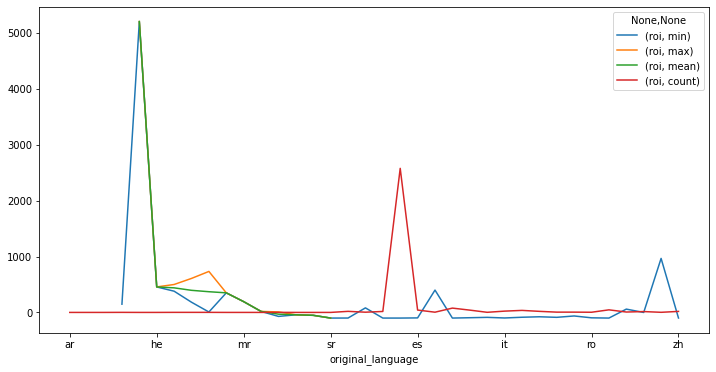

In [ ]:
lang_roi_df.plot(figsize = (12,6));

## Find out the unique genres of movies in this dataset

In [ ]:
data[['original_title', 'genres_list']]

,original_title,genres_list
0,Hot Tub Time Machine 2,[Comedy]
1,The Princess Diaries 2: Royal Engagement,"[Comedy, Drama, Family, Romance]"
2,Whiplash,[Drama]
3,Kahaani,"[Thriller, Drama]"
4,마린보이,"[Action, Thriller]"
...,...,...
2995,Chasers,"[Comedy, Romance]"
2996,Vi är bäst!,"[Drama, Music]"
2997,The Long Kiss Goodnight,"[Crime, Action, Mystery, Thriller]"
2998,Along Came Polly,"[Comedy, Romance]"


Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?

In [ ]:
data_subset = data[['original_title', 'producer', 'director', 'profit', 'roi']]
data_subset = data_subset.explode('producer').reset_index(drop=True)
data_subset = data_subset[data_subset['roi']!=np.inf]
data_subset.head(6)

,original_title,producer,director,profit,roi
0,Hot Tub Time Machine 2,Andrew Panay,Steve Pink,-1685349,-12.038207
1,The Princess Diaries 2: Royal Engagement,Whitney Houston,Garry Marshall,55149435,137.873588
2,The Princess Diaries 2: Royal Engagement,Mario Iscovich,Garry Marshall,55149435,137.873588
3,The Princess Diaries 2: Royal Engagement,Debra Martin Chase,Garry Marshall,55149435,137.873588
4,Whiplash,David Lancaster,Damien Chazelle,9792000,296.727273
5,Whiplash,Michel Litvak,Damien Chazelle,9792000,296.727273


In [ ]:
# groupby on producer and get the average roi

producer_roi = data_subset.groupby('producer')['roi'].mean().round(2).reset_index()

producer_roi = producer_roi.sort_values(by = 'roi', ascending=False)

producer_roi.head(3)

,producer,roi
1538,Lee Eun-ha,419747562.5
1112,Jang Jin,419747562.5
1211,Ji Sang-yong,419747562.5


## Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.

In [ ]:
data_actor = data[['original_title', 'actors', 'genres_list', 'profit']]
data_actor = data_actor.explode('actors')
data_actor

,original_title,actors,genres_list,profit
0,Hot Tub Time Machine 2,Rob Corddry,[Comedy],-1685349
0,Hot Tub Time Machine 2,Craig Robinson,[Comedy],-1685349
0,Hot Tub Time Machine 2,Clark Duke,[Comedy],-1685349
0,Hot Tub Time Machine 2,Adam Scott,[Comedy],-1685349
1,The Princess Diaries 2: Royal Engagement,Anne Hathaway,"[Comedy, Drama, Family, Romance]",55149435
...,...,...,...,...
2998,Along Came Polly,Debra Messing,"[Comedy, Romance]",129963386
2999,Abduction,Taylor Lautner,"[Thriller, Action, Mystery]",47087155
2999,Abduction,Lily Collins,"[Thriller, Action, Mystery]",47087155
2999,Abduction,Alfred Molina,"[Thriller, Action, Mystery]",47087155


In [ ]:
a_name = data_actor['actors'].value_counts().index[0]

a_df = data_actor[data_actor['actors'] == a_name]

a_df

,original_title,actors,genres_list,profit
409,This Boy’s Life,Robert De Niro,[Drama],4104962
506,What Just Happened,Robert De Niro,"[Comedy, Drama]",-18326578
553,Mad Dog and Glory,Robert De Niro,"[Comedy, Crime, Romance, Drama]",11081586
752,Lenny Bruce: Swear to Tell the Truth,Robert De Niro,"[Comedy, Documentary]",21350
805,Red Lights,Robert De Niro,[Thriller],-448826
1170,Falling in Love,Robert De Niro,"[Drama, Romance]",11129057
1192,Wag the Dog,Robert De Niro,"[Comedy, Drama]",49256513
1217,Meet the Parents,Robert De Niro,"[Comedy, Romance]",275444045
1374,Marvin's Room,Robert De Niro,[Drama],-10196695
1389,Sleepers,Robert De Niro,"[Crime, Drama, Thriller]",121615285


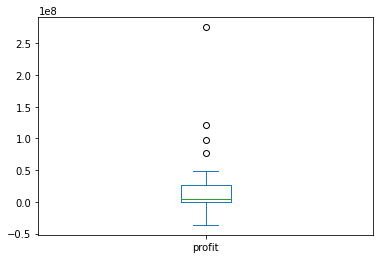

In [ ]:
a_df['profit'].plot(kind='box');

# Top 3 directors prefer which actors the most?

In [ ]:
# Top 3 should  directed atleast 3 movie and 

In [ ]:
# function To find directors name from genres:
dire_name=data[['Actors','Director','original_title','profit']]
dire_name=dire_name.explode('Actors').reset_index(drop=True)
#dire_name=dire_name.explode('Director').reset_index(drop=True)
#group by Director with profit and actor with profit
df_1=dire_name.groupby(['Director'])['profit'].max().reset_index()
df_2=dire_name.groupby(['Actors'])['profit'].max().reset_index()
# Sorted profit to calculate top 3 director on the based of max profit
df_1=df_1.sort_values(by = 'profit', ascending=False)[:3]
df_2=df_2.sort_values(by = 'profit', ascending=False)
# Merge 
df_top_3_director=pd.merge(df_1,df_2,how='inner')
df_top_3_director[["Director","Actors"]]